<a href="https://colab.research.google.com/github/IsaiasGabrielDev/Trabalho_FuzzyBasquete/blob/main/trabalho_basquete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

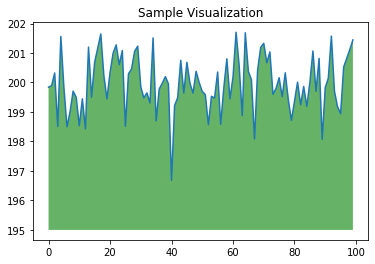

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()


In [3]:
!pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 44.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=afcde5a459eb77c1707282e78f26511889205f097a1f0b1720c6f2dd93efbf77
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl
import skfuzzy as fuzz


exemplo


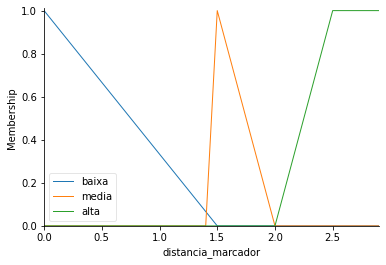

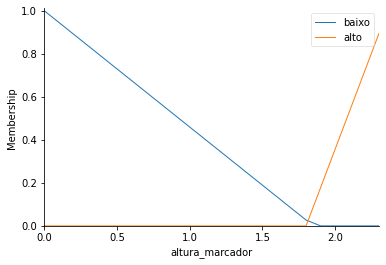

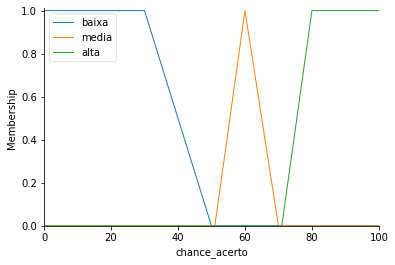

In [28]:
    if __name__=='__main__':
            print("exemplo")

            #variaveis de entrada 
            distancia_marcador = ctrl.Antecedent(np.arange(0,3,0.10),'distancia_marcador')
            altura_marcador = ctrl.Antecedent(np.arange(0,2.34,0.10),'altura_marcador' )

            #variaveis de saida
            chance_acerto = ctrl.Consequent(np.arange(0,101,1),'chance_acerto')

            #variaveis/ fuzzyficaçao 
            distancia_marcador['baixa'] = fuzz.trapmf(distancia_marcador.universe,[0,0,0,1.50])
            distancia_marcador['media'] = fuzz.trimf(distancia_marcador.universe,[1.5,1.5,2])
            distancia_marcador['alta'] = fuzz.trapmf(distancia_marcador.universe,[2,2.5,3,3])

            altura_marcador ['baixo'] = fuzz.trapmf(altura_marcador.universe,[0,0,0,1.85])
            altura_marcador ['alto'] = fuzz.trimf(altura_marcador.universe,[1.80,2.36,3.3])
            
            chance_acerto['baixa'] = fuzz.trapmf(chance_acerto.universe,[0,0,30,50])
            chance_acerto['media'] = fuzz.trimf(chance_acerto.universe,[51,60,70])
            chance_acerto['alta'] = fuzz.trapmf(chance_acerto.universe,[71,80,100,100])

            #print os traços 
            distancia_marcador.view()
            altura_marcador.view()
            chance_acerto.view()
            plt.show()

85.68165758963305


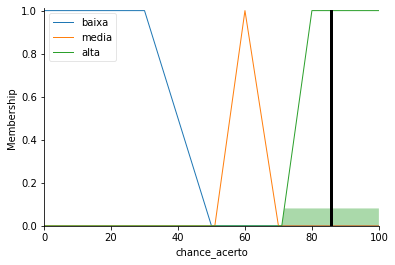

In [36]:
          #definicao das regras 

          regra1 = ctrl.Rule(distancia_marcador['alta'] & altura_marcador['baixo'],chance_acerto['alta'])
          regra2 = ctrl.Rule(distancia_marcador['alta'] & altura_marcador['alto'],chance_acerto['media'])
          regra3 = ctrl.Rule(distancia_marcador['media'] & altura_marcador['alto'],chance_acerto['baixa'])
          regra4 = ctrl.Rule(distancia_marcador['media'] & altura_marcador['baixo'],chance_acerto['alta'])
          regra5 = ctrl.Rule(distancia_marcador['baixa'] & altura_marcador['baixo'],chance_acerto['media'])
          regra6 = ctrl.Rule(distancia_marcador['baixa'] & altura_marcador['alto'],chance_acerto['baixa'])

          #ativacao das regras 

          controle_chance_acerto = ctrl.ControlSystem([regra1,regra2,regra3,regra4, regra5, regra6])
          simulador_chance_acerto = ctrl.ControlSystemSimulation(controle_chance_acerto)

          simulador_chance_acerto.input['distancia_marcador']= 3
          simulador_chance_acerto.input['altura_marcador']= 1.7

          simulador_chance_acerto.compute()

          #agregação

          print(simulador_chance_acerto.output['chance_acerto'])
          chance_acerto.view(sim=simulador_chance_acerto)
          plt.show()